Saving 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident-.jpg to 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident- (1).jpg
Uploaded: 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident- (1).jpg
Do you want to upload another image? (yes/no): no
Processing image: 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident- (1).jpg

0: 448x640 1 person, 1 car, 1 motorcycle, 163.1ms
Speed: 6.5ms preprocess, 163.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Label: person, Confidence: 0
Label: car, Confidence: 0
Label: motorcycle, Confidence: 0


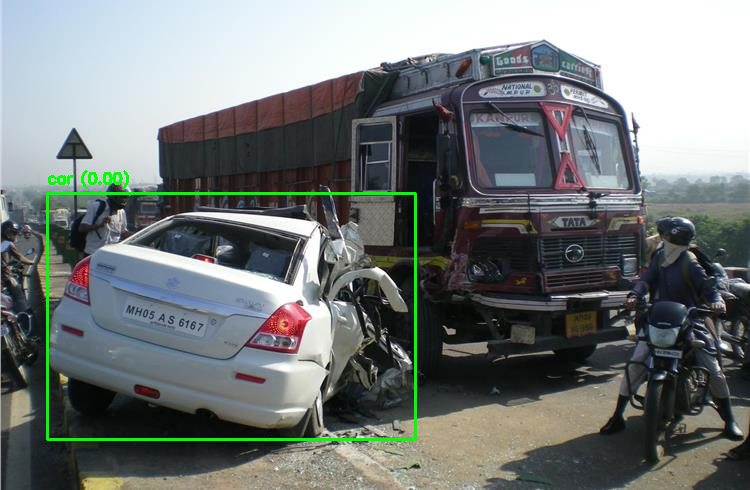

No license plate detected.


In [2]:
# Install necessary packages if not already installed
!pip install ultralytics opencv-python pytesseract

# Import required libraries
from ultralytics import YOLO
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import files

# Initialize Tesseract (for OCR)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Default for Colab

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Change to other versions if required (e.g., 'yolov8s.pt')

# Function to detect vehicles and license plates
def detect_vehicles_and_plates(image_path):
    # Read the input image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return

    # Detect objects using YOLOv8 with adjusted confidence threshold
    results = model(img, conf=0.5)  # Use 30% confidence threshold

    # Parse detection results
    detections = results[0].boxes.data.cpu().numpy()  # Convert YOLO detections to numpy array
    found_vehicle = False  # Flag to track if any vehicle is detected
    plate_texts = []  # List to store detected license plate texts

    for detection in detections:
        x1, y1, x2, y2, confidence, cls = map(int, detection[:6])
        label = model.names[cls]

        # Debug: Print the detected classes and confidence levels
        print(f"Label: {label}, Confidence: {confidence}")

        # Filter for vehicles and license plates
        if label in ['car', 'truck', 'bus', 'motorbike']:  # Adjust based on your dataset
            found_vehicle = True
            # Draw bounding box around vehicles
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{label} ({confidence:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        elif label == 'license_plate':  # Assuming YOLOv8 detects plates
            # Crop and extract license plate
            plate_img = img[y1:y2, x1:x2]
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, "License Plate", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # Step 1: OCR to extract text
            # Preprocess image for OCR
            gray_plate = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
            _, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            processed_plate = cv2.GaussianBlur(thresh_plate, (5, 5), 0)

            plate_text = pytesseract.image_to_string(processed_plate, config='--psm 8')  # OCR configuration for single-line text
            print(f"Detected Plate Text: {plate_text.strip()}")
            plate_texts.append(plate_text.strip())

            # Display cropped license plate
            cv2_imshow(processed_plate)

    if not found_vehicle:
        print("No vehicles detected.")

    # Display the final annotated image
    cv2_imshow(img)

    # Step 2: Print all detected license plate texts
    if plate_texts:
        print("Detected License Plates:")
        for text in plate_texts:
            print(f"Plate: {text}")
    else:
        print("No license plate detected.")

# Function to upload multiple images
def upload_multiple_images():
    uploaded_files = []  # List to store uploaded images

    # Prompt for file upload multiple times
    while True:
        uploaded = files.upload()
        for image_name in uploaded.keys():
            uploaded_files.append(image_name)
            print(f"Uploaded: {image_name}")

        # Ask the user if they want to upload more images
        more = input("Do you want to upload another image? (yes/no): ")
        if more.lower() != 'yes':
            break

    return uploaded_files

# Upload multiple images and process them
uploaded_files = upload_multiple_images()

# Process each uploaded image
for image_name in uploaded_files:
    print(f"Processing image: {image_name}")
    detect_vehicles_and_plates(image_name)


In [3]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 20.0 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Saving 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident-.jpg to 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident- (2).jpg
Uploaded: 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident- (2).jpg
Do you want to upload another image? (yes/no): no
Processing image: 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident- (2).jpg

0: 448x640 1 person, 1 car, 2 motorcycles, 1 bus, 1 truck, 150.7ms
Speed: 6.1ms preprocess, 150.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Label: person, Confidence: 0
Label: car, Confidence: 0
Label: motorcycle, Confidence: 0
Label: truck, Confidence: 0
Label: motorcycle, Confidence: 0
Label: bus, Confidence: 0


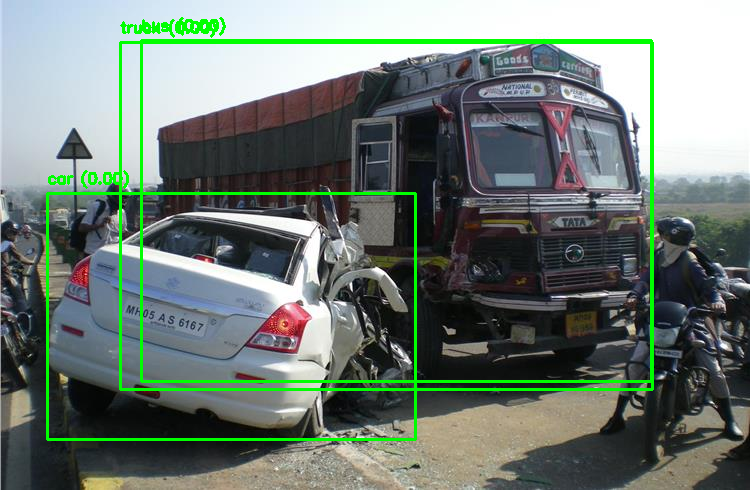

No license plate detected.


In [4]:
# Install necessary packages if not already installed
!pip install ultralytics opencv-python pytesseract easyocr

# Import required libraries
from ultralytics import YOLO
import cv2
import easyocr
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import files

# Initialize EasyOCR
reader = easyocr.Reader(['en'])  # Initialize EasyOCR with English language

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Load the YOLOv8 model (or choose another version)

# Function to detect vehicles and license plates
def detect_vehicles_and_plates(image_path):
    # Read the input image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return

    # Detect objects using YOLOv8 with adjusted confidence threshold
    results = model(img, conf=0.3)  # Use 30% confidence threshold

    # Parse detection results
    detections = results[0].boxes.data.cpu().numpy()  # Convert YOLO detections to numpy array
    found_vehicle = False  # Flag to track if any vehicle is detected
    plate_texts = []  # List to store detected license plate texts

    for detection in detections:
        x1, y1, x2, y2, confidence, cls = map(int, detection[:6])
        label = model.names[cls]

        # Debug: Print the detected classes and confidence levels
        print(f"Label: {label}, Confidence: {confidence}")

        # Filter for vehicles (YOLO might detect other objects like people, bikes, etc.)
        if label in ['car', 'truck', 'bus', 'motorbike']:  # Adjust based on your dataset
            found_vehicle = True
            # Draw bounding box around vehicles
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{label} ({confidence:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        elif label == 'license_plate':  # Check if the class is license plate
            # Crop and extract license plate
            plate_img = img[y1:y2, x1:x2]
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, "License Plate", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

            # Use EasyOCR to extract text from the plate image
            plate_text = reader.readtext(plate_img)
            for (_, text, _) in plate_text:
                print(f"Detected Plate Text: {text.strip()}")
                plate_texts.append(text.strip())

            # Display cropped license plate
            cv2_imshow(plate_img)

    if not found_vehicle:
        print("No vehicles detected.")

    # Display the final annotated image
    cv2_imshow(img)

    # Step 2: Print all detected license plate texts
    if plate_texts:
        print("Detected License Plates:")
        for text in plate_texts:
            print(f"Plate: {text}")
    else:
        print("No license plate detected.")

# Function to upload multiple images
def upload_multiple_images():
    uploaded_files = []  # List to store uploaded images

    # Prompt for file upload multiple times
    while True:
        uploaded = files.upload()
        for image_name in uploaded.keys():
            uploaded_files.append(image_name)
            print(f"Uploaded: {image_name}")

        # Ask the user if they want to upload more images
        more = input("Do you want to upload another image? (yes/no): ")
        if more.lower() != 'yes':
            break

    return uploaded_files

# Upload multiple images and process them
uploaded_files = upload_multiple_images()

# Process each uploaded image
for image_name in uploaded_files:
    print(f"Processing image: {image_name}")
    detect_vehicles_and_plates(image_name)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 22.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 94.5MB/s]


Please upload your images:


Saving 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident-.jpg to 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident-.jpg
Uploaded files: ['1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident-.jpg']
Processing image: 1da2f1b0-9a52-42a3-bac4-26300024df07_Road-accident-.jpg

0: 448x640 1 person, 1 car, 2 motorcycles, 1 bus, 1 truck, 356.7ms
Speed: 21.3ms preprocess, 356.7ms inference, 35.6ms postprocess per image at shape (1, 3, 448, 640)


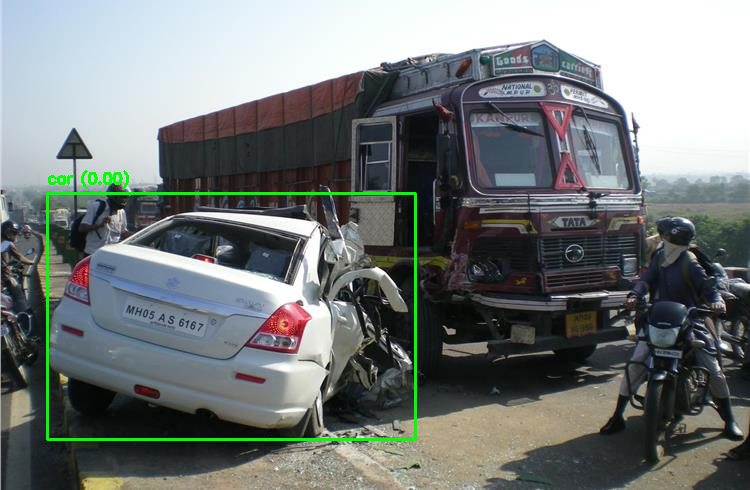

No license plate detected.


In [2]:
# Install necessary packages
!pip install ultralytics opencv-python pytesseract

# Import libraries
from ultralytics import YOLO
import cv2
import pytesseract
from google.colab.patches import cv2_imshow
from google.colab import files
import numpy as np

# Configure Tesseract OCR for Google Colab
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'  # Path for Colab

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Use YOLOv8 nano model; replace with a license plate-specific model if available

# Function to detect vehicles and license plates
def detect_vehicles_and_plates(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image {image_path}")
        return

    # Run YOLOv8 detection
    results = model(img)

    # Parse YOLO detection results
    detections = results[0].boxes.data.cpu().numpy()
    plate_texts = []

    for detection in detections:
        x1, y1, x2, y2, confidence, cls = map(int, detection[:6])
        label = model.names[cls]

        if label == 'car' or label == 'license_plate':  # Modify as per the dataset's label
            # Draw bounding boxes on the detected objects
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f"{label} ({confidence:.2f})", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            if label == 'license_plate':
                # Crop and preprocess the license plate region
                plate_img = img[y1:y2, x1:x2]
                gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
                thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

                # Extract text using Tesseract OCR
                plate_text = pytesseract.image_to_string(thresh, config='--psm 7').strip()
                if plate_text:
                    print(f"Detected Plate Text: {plate_text}")
                    plate_texts.append(plate_text)

                # Display the license plate image
                cv2_imshow(thresh)

    # Display the annotated image
    cv2_imshow(img)

    # Print all detected license plate texts
    if plate_texts:
        print("Detected License Plates:")
        for text in plate_texts:
            print(f"Plate: {text}")
    else:
        print("No license plate detected.")

# Function to upload and process multiple images
def upload_multiple_images():
    print("Please upload your images:")
    uploaded_files = files.upload()  # Upload multiple images using Colab's file picker
    image_names = list(uploaded_files.keys())
    print(f"Uploaded files: {image_names}")
    return image_names

# Main flow: Upload and process images
uploaded_files = upload_multiple_images()

# Process each uploaded image
for image_name in uploaded_files:
    print(f"Processing image: {image_name}")
    detect_vehicles_and_plates(image_name)


In [6]:
import csv

# Function to save license plate data to a CSV file
def save_to_csv(plate_texts, csv_filename="detected_plates.csv"):
    with open(csv_filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Plate Number"])  # Header
        for plate in plate_texts:
            writer.writerow([plate])
    print(f"License plate data saved to {csv_filename}")


In [7]:
from google.colab import files
files.download("detected_plates.csv")


FileNotFoundError: Cannot find file: detected_plates.csv